# Uber Data Analysis

### Introduction

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import the dataset
uber = pd.read_csv('UberDataset.csv')
uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:

#Dataset info
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
#Data Preprocessing
# Check for missing values
uber.isnull().sum()


START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [ ]:
#Filling missing values in 'PURPOSE' column with 'NOT'
uber['PURPOSE'].fillna("NOT", inplace=True)
#missing values in 'PURPOSE' column are filled with 'NOT'
uber.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_21300\1666955233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber['PURPOSE'].fillna("NOT", inplace=True)


START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [ ]:
#Changing data types for Start Date and End Date columns
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'],format='mixed', errors='coerce')
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'],format='mixed', errors='coerce')

In [ ]:
# Categories for Start Date into MORNING, AFTERNOON, EVENING, NIGHT
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'MORNING'
    elif 12 <= hour < 17:
        return 'AFTERNOON'
    elif 17 <= hour < 21:
        return 'EVENING'
    else:
        return 'NIGHT'
uber['START_TIME_CATEGORY'] = uber['START_DATE'].dt.hour.apply(categorize_time)

uber  


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_TIME_CATEGORY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,NIGHT
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,NIGHT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,EVENING
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,EVENING
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,AFTERNOON
...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,AFTERNOON
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,AFTERNOON
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,NIGHT
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NIGHT


In [ ]:
#Check for missing values again
uber.isnull().sum()

START_DATE             1
END_DATE               1
CATEGORY               1
START                  1
STOP                   1
MILES                  0
PURPOSE                0
START_TIME_CATEGORY    0
dtype: int64

In [ ]:
#Dropping rows with missing values
uber.dropna(inplace=True)
uber.isnull().sum()

START_DATE             0
END_DATE               0
CATEGORY               0
START                  0
STOP                   0
MILES                  0
PURPOSE                0
START_TIME_CATEGORY    0
dtype: int64

In [ ]:
#Dropping duplicate rows
uber.drop_duplicates(inplace=True)


### Analysis
In this project, we will perform a comprehensive descriptive analysis of the Uber dataset to develop an initial understanding of user travel behavior. This analysis will include examining key metrics such as the total number of trips, average distance traveled, and the distribution of trip purposes, including common reasons like Meetings and Meal/Entertainment. We will also analyze ride categories (Business vs. Personal).

In addition, we will explore time-based trends by analyzing trip frequency by hour of the day, day of the week, and month. This will help uncover peak usage periods and typical daily or weekly travel patterns. 

In [ ]:
# Total number of trips
total_trips = uber.shape[0]
# Average distance traveled
average_distance = uber['MILES'].mean()
#Printing the average distance traveled and total number of trips
print(f"Total number of trips: {total_trips}")
print(f"Average distance traveled: {average_distance:.2f} miles")

Total number of trips: 1154
Average distance traveled: 10.57 miles


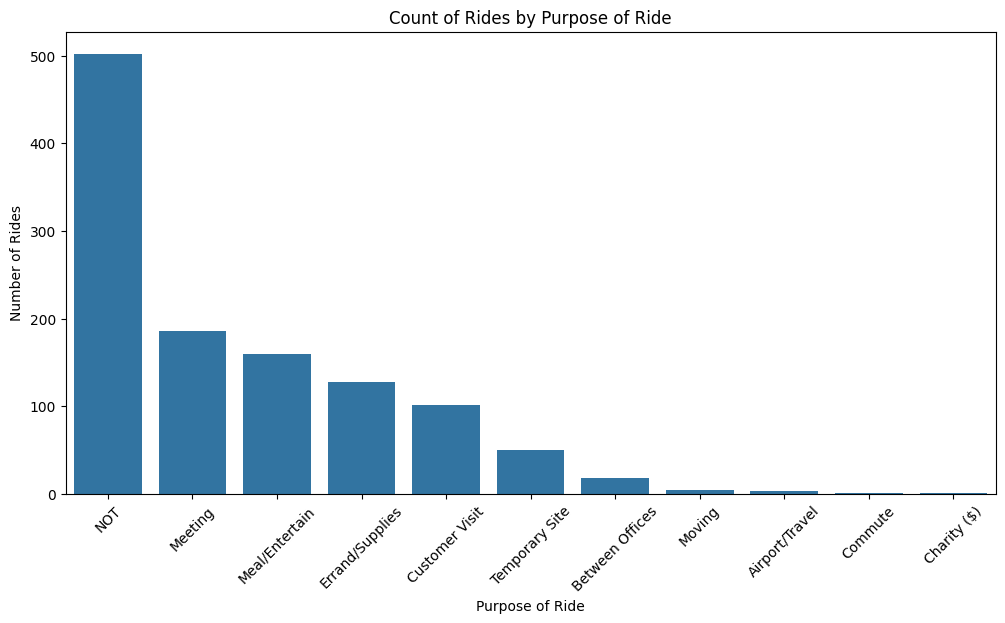

In [ ]:
#Trip Frequency
#Purpose of trips
purpose_order = uber['PURPOSE'].value_counts().index.tolist()
# Count plot for Purpose Categories
plt.figure(figsize=(12, 6))
sns.countplot(data=uber, x='PURPOSE', order=purpose_order)
plt.title('Count of Rides by Purpose of Ride')
plt.xlabel('Purpose of Ride')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

Most people tend to book Uber rides primarily for Meetings and Meal/Entertainment purposes, indicating that the platform is frequently used for professional engagements and social outings.

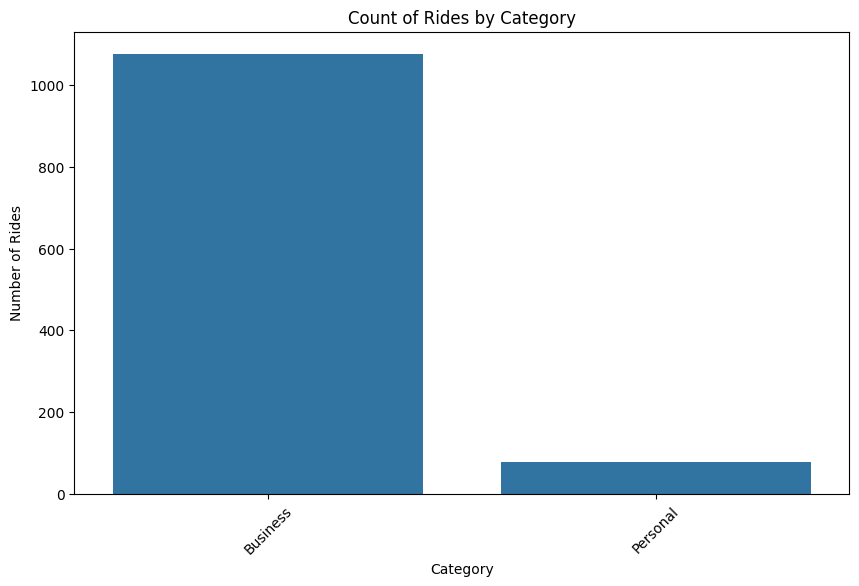

In [ ]:
#Categories of trips
# Count plot for Category
plt.figure(figsize=(10, 6))
sns.countplot(data=uber, x='CATEGORY')
plt.title('Count of Rides by Category')
plt.xlabel('Category')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

Most of the rides in the dataset are booked for business purposes, highlighting Uber's strong role as a transportation choice for professional and work-related travel.

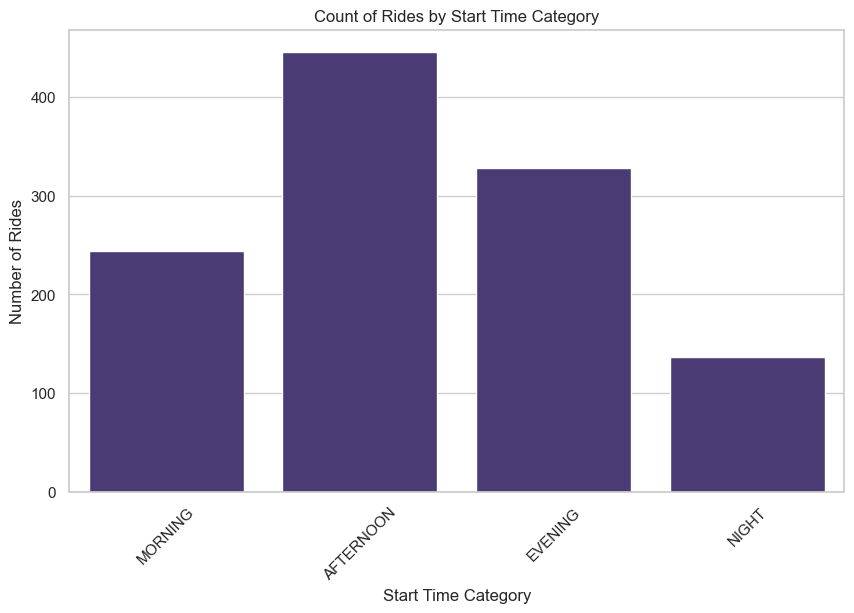

In [ ]:
#Trips per Time of the Day
#Categories of Start Time into MORNING, AFTERNOON, EVENING, NIGHT
#Categories of Start Time in order
start_time_order = ['MORNING', 'AFTERNOON', 'EVENING', 'NIGHT']
# Count plot for Start Time Categories
sns.set(style="whitegrid")
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
sns.countplot(data=uber, x='START_TIME_CATEGORY', order=start_time_order)
plt.title('Count of Rides by Start Time Category')
plt.xlabel('Start Time Category')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

The analysis shows that:
The Afternoon is the most active period for rides, with over 450 trips, indicating a peak in travel demand during working or mid-day hours.
Evening comes next with a significant number of rides, suggesting frequent usage for post-work commutes or social outings.
Morning rides are slightly fewer, potentially representing work commutes or early meetings.
Night has the lowest ride count, which may reflect reduced travel demand or safety considerations during late hours.

This pattern highlights that Uber is most commonly used during the middle and end of the day, aligning with typical business hours and social activities.

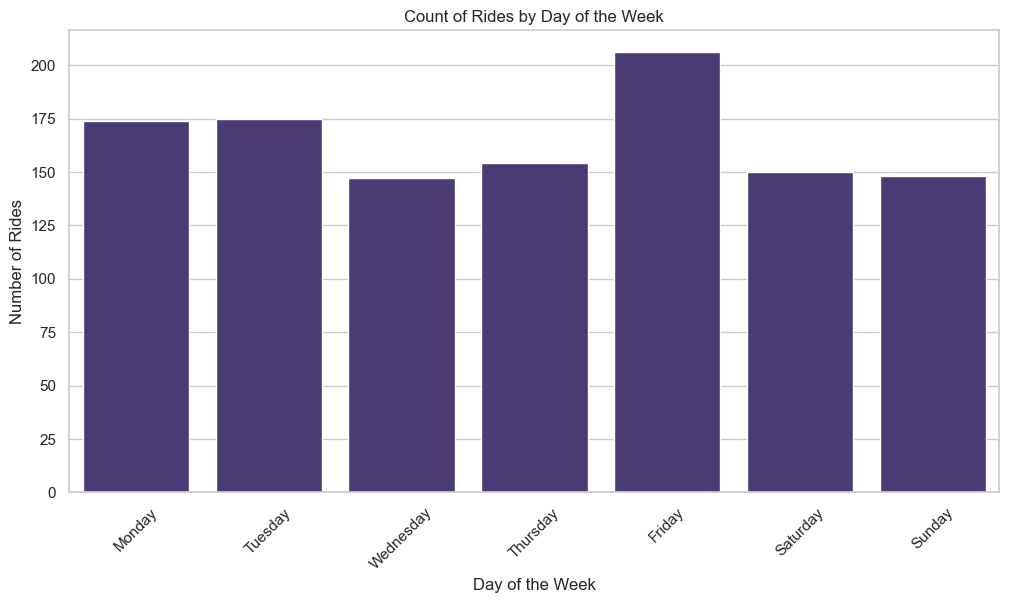

In [ ]:
# Trip Frequency by Day of the Week
# Extract day of the week
uber['DAY_OF_WEEK'] = uber['START_DATE'].dt.day_name()

# Define correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert DAY_OF_WEEK to ordered categorical type
uber['DAY_OF_WEEK'] = pd.Categorical(uber['DAY_OF_WEEK'], categories=weekday_order, ordered=True)

# Plot trips by day of the week in the correct order
plt.figure(figsize=(12, 6))
sns.countplot(data=uber, x='DAY_OF_WEEK', order=weekday_order)
plt.title('Count of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()


The bar chart shows how Uber ride activity varies throughout the week. The data reveals that Friday has the highest number of rides, suggesting increased travel activity at the end of the workweek—likely due to business wrap-ups or social plans.

Both Monday and Tuesday also show high ride volumes, reflecting typical work-related travel early in the week. Midweek days like Wednesday and Thursday see a slight drop, while Saturday and Sunday have similar ride frequencies, indicating moderate weekend usage.

This trend suggests that Uber is primarily used during weekdays, with a noticeable peak on Fridays, reinforcing its role in facilitating both professional and end-of-week social mobility.

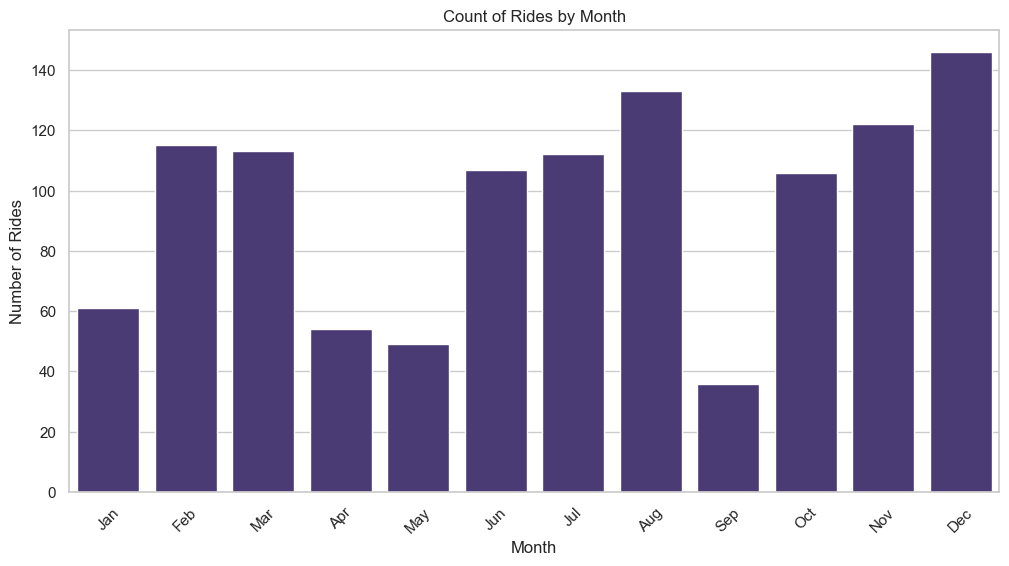

In [ ]:
#Trips per Month
# Extracting the month from START_DATE
uber['MONTH'] = uber.START_DATE.dt.month
# Month label mapping
month_label = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
uber['MONTH'] = uber['MONTH'].map(month_label)
# Count plot for Month Categories

# Define the correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot count of trips by month in the correct order
plt.figure(figsize=(12, 6))
sns.countplot(data=uber, x='MONTH', order=month_order)
plt.title('Count of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

December is recording the highest number of rides, followed by August, November, and early-year months like February and March, each with over 100 rides. September had the lowest ride count, with around 35 rides.

This monthly trend aligns with the observation that most people book Uber rides for Meetings and Meal/Entertainment purposes. The peaks in December and August may reflect increased social outings, end-of-year gatherings, and professional events, while high rides in months like February and March could correspond to business meetings early in the year. Conversely, the dip in September suggests a period with fewer social or professional activities, possibly due to transitional periods in work cycles or reduced events.

Overall, the data indicates that professional engagements and social activities significantly drive Uber usage trends, with ride counts increasing during months that typically have heightened business and social activities.

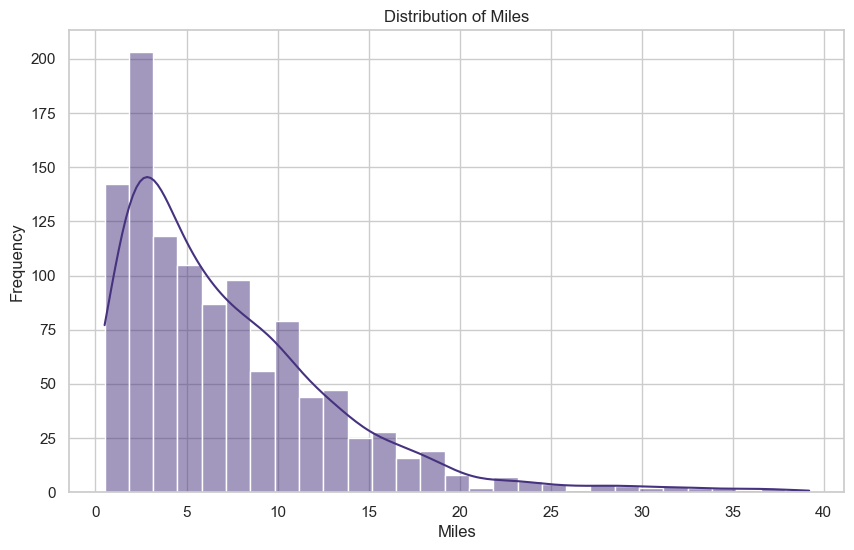

In [ ]:
#Distplot for Miles < 40

plt.figure(figsize=(10, 6))
sns.histplot(uber[uber['MILES']<40]['MILES'],kde=True)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()


The data is highly right-skewed, with the majority of rides being short-distance trips. Most rides are concentrated between 1 and 5 miles, with the highest frequency around 2-3 miles, after which the frequency declines sharply. Only a few rides exceed 20 miles, and rides longer than 30 miles are rare.
This distribution indicates that most Uber users prefer short trips, likely for quick commutes, meetings within the city, or nearby meal/entertainment locations. The low frequency of long-distance rides suggests that Uber is less commonly used for intercity travel or trips exceeding 20 miles, supporting the earlier observation that rides are primarily for professional engagements and social outings rather than long journeys.